# CS20B1067 KODAM KARTHIK
# DIGITAL IMAGE PROCESSING
#  ASSIGNMENT 1


In [1]:
# convert the lena image to grey scale image
%pdb
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv





Automatic pdb calling has been turned ON


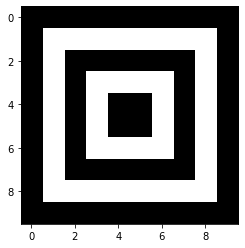

In [2]:
#read the image
img = Image.open('Lena.png')
img = img.convert('L')
img = np.array(img)

#display the image
plt.imshow(img, cmap='gray')
plt.show()

#save the image
plt.imsave('LenaG.png', img, cmap='gray')



# Interpolation without using inbuilt functions

In [3]:

def bilinear_interpolation(img, scale):
    # get the size of the image
    height, width = img.shape
    # calculate the new size of the image
    new_height = int(height * scale)
    new_width = int(width * scale)
    # create a new image with the new size
    new_img = np.zeros((new_height, new_width))
    # calculate the scale factor
    scale_height = height / new_height
    scale_width = width / new_width
    # loop through the new image
    for i in range(new_height):
        for j in range(new_width):
            # calculate the position of the pixel in the original image
            x = (i ) * scale_height
            y = (j) * scale_width     
            # calculate the position of the pixel in the original image
            x1 = int(np.floor(x))
            x2 = min(x1 + 1, height - 1)
            y1 = int(np.floor(y))
            y2 = min(y1 + 1, width - 1)
            # calculate the weight
            weight_x = x - x1
            weight_y = y - y1
            # calculate the new pixel value
            new_img[i, j] = (1 - weight_x) * (1 - weight_y) * img[x1, y1] + weight_x * (1 - weight_y) * img[x2, y1] + (1 - weight_x) * weight_y * img[x1, y2] + weight_x * weight_y * img[x2, y2]
    return new_img


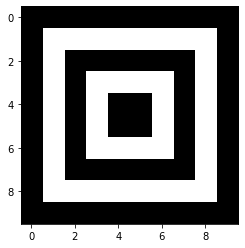

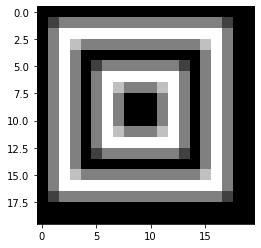

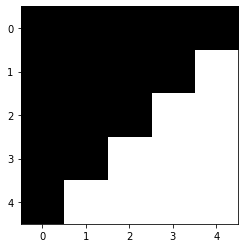

In [4]:
# scale the new_img with factors 1,2,0.5

new_img1 = bilinear_interpolation(img, 1)
new_img2 = bilinear_interpolation(img, 2)
new_img3 = bilinear_interpolation(img, 0.5)

#display the images
plt.imshow(new_img1, cmap='gray')
plt.show()
plt.imshow(new_img2, cmap='gray')
plt.show()
plt.imshow(new_img3, cmap='gray')
plt.show()

# Interpolation using inbuilt functions (opencv)

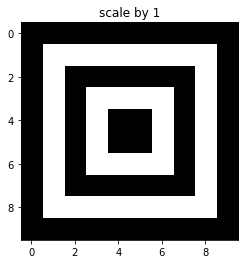

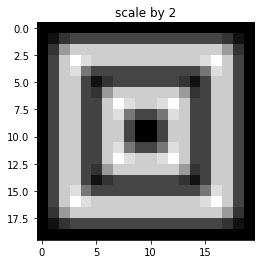

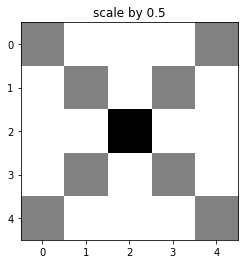

In [5]:
img_1=cv.resize(img,None,fx=1,fy=1,interpolation=cv.INTER_LINEAR)
plt.imshow(img_1, cmap='gray')
plt.title("scale by 1")
plt.show()
img_2=cv.resize(img,None,fx=2,fy=2,interpolation=cv.INTER_LINEAR)
plt.imshow(img_2, cmap='gray')
plt.title("scale by 2")
plt.show()
img_3=cv.resize(img,None,fx=0.5,fy=0.5,interpolation=cv.INTER_LINEAR)
plt.imshow(img_3, cmap='gray')
plt.title("scale by 0.5")
plt.show()

In [6]:
#print number of same values in image new_img2 and img2 that has common part 


print(np.sum(new_img2[0:256,0:256] == img_2[0:256,0:256]))


# #print total number of pixels in new_img2 and img_2

# print(np.sum(new_img2 == img_2))

# #count the number of same pixel values in new_img2 and img_2 having common part















80
